In [1]:
#Polynomial Regression
# It is having curve, we try to fit the data into the curve
# We add some term to convert linear regression into the polynomial regression
# y=a0+a1x^1+a2x^2
# data-> polynomial transform-> linear transform-> predictive output


##### Dataset

In [2]:
# Salary_Data.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
x=np.arange(0,10,0.25)
x

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25,
       5.5 , 5.75, 6.  , 6.25, 6.5 , 6.75, 7.  , 7.25, 7.5 , 7.75, 8.  ,
       8.25, 8.5 , 8.75, 9.  , 9.25, 9.5 , 9.75])

In [6]:
y_lin=x*4.5+8.23

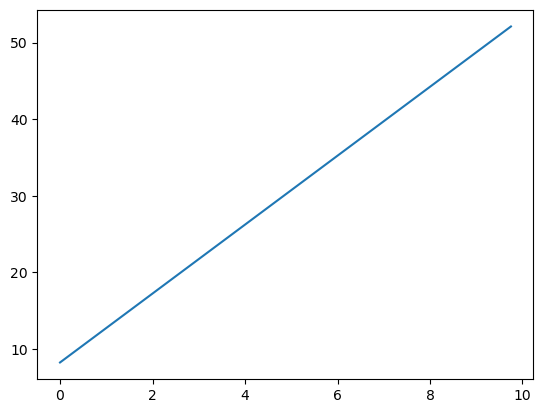

In [7]:
plt.plot(x,y_lin)

In [11]:
y_pol=x**2+56.34

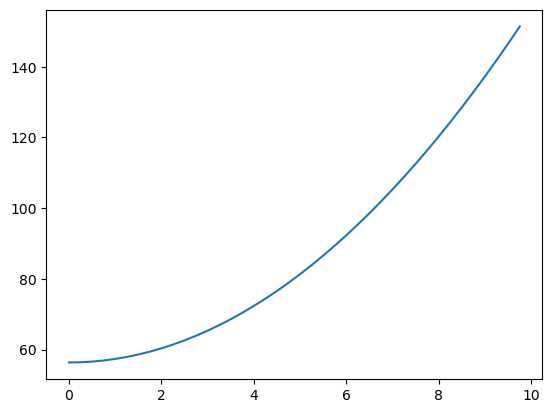

In [12]:
plt.plot(x, y_pol)

In [15]:
x=np.arange(1,11)

In [16]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
# using function 

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x.reshape(-1,1))

In [18]:
x_poly # x^0, x^1, x^2

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [19]:
x.reshape(-1,1) # 

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

##### Polynomial Regression

In [21]:
df=pd.read_csv('datasets/Salary_Data.csv')
x=df[['YearsExperience']]# multidimensional array
y=df['Salary']

In [22]:
from sklearn.linear_model import LinearRegression # get the Linear Regressin file
reg=LinearRegression()# create the object 
reg.fit(x,y)# call the fit function by giving input and output so that it can find out correlation
print('Accuracy', reg.score(x,y))# find the score how accurate it is giving pattern

Accuracy 0.9569566641435086


In [23]:
poly=PolynomialFeatures(degree=2)# converting it into 2 degree polynomial
x_poly=poly.fit_transform(x)# transformed the data

In [24]:
x_poly

array([[  1.  ,   1.1 ,   1.21],
       [  1.  ,   1.3 ,   1.69],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.2 ,   4.84],
       [  1.  ,   2.9 ,   8.41],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.2 ,  10.24],
       [  1.  ,   3.2 ,  10.24],
       [  1.  ,   3.7 ,  13.69],
       [  1.  ,   3.9 ,  15.21],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.1 ,  16.81],
       [  1.  ,   4.5 ,  20.25],
       [  1.  ,   4.9 ,  24.01],
       [  1.  ,   5.1 ,  26.01],
       [  1.  ,   5.3 ,  28.09],
       [  1.  ,   5.9 ,  34.81],
       [  1.  ,   6.  ,  36.  ],
       [  1.  ,   6.8 ,  46.24],
       [  1.  ,   7.1 ,  50.41],
       [  1.  ,   7.9 ,  62.41],
       [  1.  ,   8.2 ,  67.24],
       [  1.  ,   8.7 ,  75.69],
       [  1.  ,   9.  ,  81.  ],
       [  1.  ,   9.5 ,  90.25],
       [  1.  ,   9.6 ,  92.16],
       [  1.  ,  10.3 , 106.09],
       [  1.  ,  10.5 , 110.25]])

In [25]:
# used this tranform data for the trained the data
reg.fit(x_poly,y)
print('Accuracy:',reg.score(x_poly,y))

Accuracy: 0.956975168321065


In [26]:
# very slightly change from linear to polynomial

In [27]:
poly=PolynomialFeatures(degree=4)
x_poly=poly.fit_transform(x)
reg.fit(x_poly,y)
print('Accuracy:',reg.score(x_poly,y))

Accuracy: 0.9636560599375091


In [28]:
# here accuracy is increasing but it is not increasing always

In [29]:
poly=PolynomialFeatures(degree=100)
x_poly=poly.fit_transform(x)
reg.fit(x_poly,y)
print('Accuracy:',reg.score(x_poly,y))

Accuracy: 0.4665377753624792


In [30]:
# here degree is decreasing

In [44]:
acc=[]
for i in range(2,31):
    poly=PolynomialFeatures(degree=i)          #now check what is the degree where it is giving higher accuracy result
    x_poly=poly.fit_transform(x)                # transform into polynomial form

    reg.fit(x_poly,y)                          # find the correlation
    acc.append(reg.score(x_poly,y))       # append the correlation factor

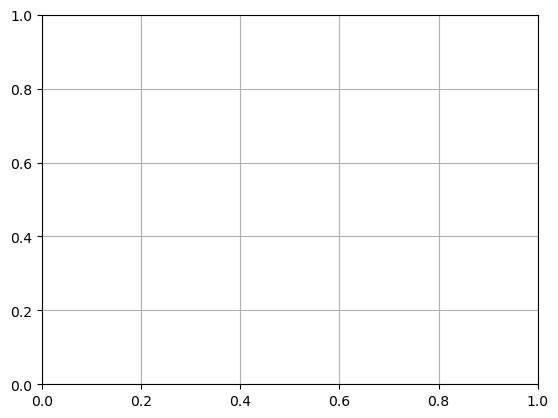

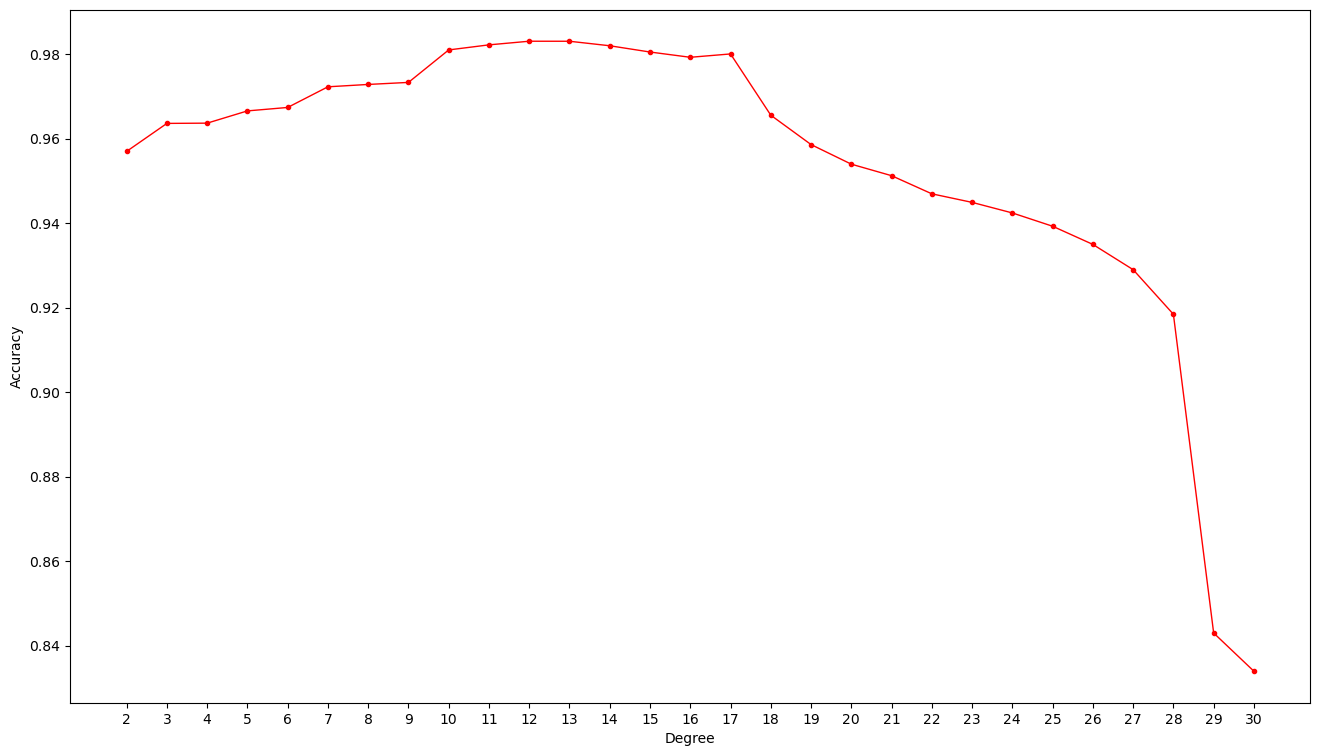

In [58]:
plt.grid()
plt.figure(figsize=(16,9))
plt.xticks(range(2,31))
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.plot(range(2,31),acc,color='r', lw=1, marker='.')

In [47]:
poly=PolynomialFeatures(degree=12)   # polynomical having degree 12
x_poly=poly.fit_transform(x)          # make linear into polynomial of having degree 12
reg.fit(x_poly,y)                     # fit part
reg.score(x_poly,y)

0.9830431165773489

In [53]:
y_pred=reg.predict(x_poly)

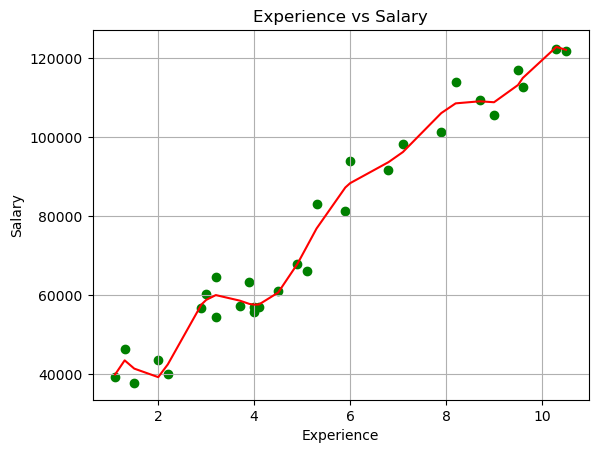

In [54]:
plt.grid()
plt.title('Experience vs Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x,y,color='green', label='actual')
plt.plot(x,y_pred,color='red', label='predicted')